## Purpose of this lecture
This lecture serves as 
1. prepare you for the coding-intensive DEAC 108.
2. an overview of what we will cover in DEAC 108.

## Dataset: 
https://archive.ics.uci.edu/ml/datasets/Adult

## Scheduling:

### Session 1: 
Steps to do upon receiving a dataset
Basic data cleaning

### Session 2:
Descriptive data analysis and how to interpret the results

### Session 3:
Quick overview of each topic in the syllabus

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Import the dataset
adult = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
col_names = ['age',
             'workclass',
             'fnlwgt',
             'education',
             'education-num',
             'marital-status',
             'occupation',
             'relationship',
             'race',
             'sex',
             'capital-gain',
             'capital-loss',
             'hours-per-week',
             'native-country',
             '<=50K']

## Task one: Read the dataset description and share your finding.

In [16]:
adult.columns = col_names
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Run Description

1. Finding nulls
2. Finding distribution for each column about 
3. Formulating the plan of data pre-processing. **Always keep your downstream tasks in mind**.

# Always, always keep your analysis [reproducible](https://en.wikipedia.org/wiki/Reproducibility).

In [19]:
adult.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,<=50K
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## Categorical versus numerical variables
We have 9 categorical variables (one of them as the target variable to predict) and 6 numerical variables.

In [26]:
categorical_variables = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country']
numerical_variables = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

In [ ]:
# Plotting histograms for numerical variables
for column in numerical_variables:
    plt.figure(figsize=(8, 6))
    adult[column].hist(bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plotting barplots for categorical variables
for column in categorical_variables:
    plt.figure(figsize=(10, 6))
    adult[column].value_counts().plot(kind='bar')
    plt.title(f'Barplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

### Let's add some box-plot for numerical variables.
Waht did you find?

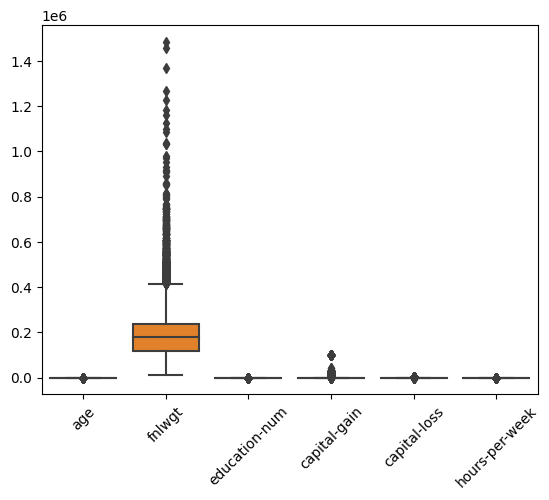

In [30]:
numerical_df = adult[numerical_variables]
# Creating the box plot using sns boxplot
sns.boxplot(data=numerical_df)
plt.xticks(rotation=45)
plt.show()

## Task 1: remove `fnlwgt` and try again.

## Let's try some correlation visualization

In [ ]:
from pandas.plotting import scatter_matrix
numerical_df = adult[numerical_variables]

# Plotting the scatter matrix
# scatter_matrix(numerical_df, figsize=(12, 12), diagonal='hist')
sns.pairplot(numerical_df)
plt.show()

## Task 2: Calculates the linear correlation coefficients of the numerical variables

## The pure correlation visualization is not very informative, let's try to add a categorical variable on top of it.


In [ ]:
# Creating the scatter matrix plot with different colors for categorical variable levels
sns.set(style="ticks")
for cat_var in categorical_variables:
    sns.pairplot(adult[numerical_variables + [cat_var]], hue=cat_var, plot_kws={"alpha": 0.5})
    plt.show()


## Task 3: Try to use the target categorical variable to visualize the correlation plot and share your insights.

### On another hand, try heatmap for categorical variables.

In [ ]:
import plotly.express as px

categorical_variables = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Creating a cross-tabulation of the categorical variables
cross_tab = pd.crosstab(adult[categorical_variables[0]], adult[categorical_variables[1]])

# Creating the interactive heatmap using plotly.express
fig = px.imshow(cross_tab.values,
                labels=dict(x=categorical_variables[1], y=categorical_variables[0]),
                x=cross_tab.columns,
                y=cross_tab.index,
                color_continuous_scale='Blues')

fig.update_layout(title='Categorical Variables Heatmap')
fig.show()


# Let's try to use other values to represent the color density.
How about average number of education.

In [ ]:
import plotly.graph_objects as go
averages = adult.groupby(categorical_variables)['education-num'].mean().reset_index()

# Create the interactive heatmap using plotly.express
fig = go.Figure(data=go.Heatmap(
    x=averages[categorical_variables[1]],
    y=averages[categorical_variables[0]],
    z=averages['education-num'],
    colorscale='Blues'))

fig.update_layout(
    xaxis=dict(title=categorical_variables[1]),
    yaxis=dict(title=categorical_variables[0]),
    title='Categorical Variables Heatmap')

fig.show()

## Task 4: Calculate and visualize average hours worked per week by race and sex.

## Task 5:  Write the SQL query that will create the data for your task 3, querying the so-called `adult` table.

What will DEAC 108 Cover

1. Perform multivariate regression analysis.
2. Perform simple discriminant analysis.
3. Perform principal component analysis.
4. Perform basic clustering analysis.